# Overview

Data Set Relevance for Reinforcement Learning

Promotions = SMA, 

donation = payment



Data Set: Direct marketing for profit opitmization

# Imports

In [13]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
import pandas as pd
from scripts.nbutilities.preprocess import percent_missing 
from string import Template
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Adjust Display Width
pd.options.display.max_columns
pd.set_option('display.max_columns', 482)
pd.set_option('display.max_rows',482)

Notes:

AGE                         Overlay Age 
                            0 = missing

# Data Set

In [3]:
df = pd.read_csv("../data/cup98LRN.txt")
df.head()

/Users/stewarta/d3_repos/rlearn_exploration/rlearn_exp_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [5]:
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

## Class Imbalance

* TARGET_B                    Target Variable: Binary Indicator for Response to  97NK Mailing
                            
* TARGET_D                    Target Variable: Donation Amount (in $) associated  with the Response to 97NK Mailing

* HPHONE_D                    Indicator for presence of a published home  phone number 

In [10]:
df.groupby('TARGET_B').size()

TARGET_B
0    90569
1     4843
dtype: int64

The data set is highly skewed. Typical behavior also in debt collection.

# Handling Missing Data 

Check the percentage of missing data.

In [10]:
percent_missing(df, df.columns)

,Total,Perc_Missing
RDATE_5,95403,99.990567
RAMNT_5,95403,99.990567
RDATE_3,95170,99.746363
RAMNT_3,95170,99.746363
RDATE_4,95131,99.705488
RAMNT_4,95131,99.705488
RAMNT_6,94636,99.186685
RDATE_6,94636,99.186685
RAMNT_15,88150,92.388798
RDATE_15,88150,92.388798


Lots a data is missing Are there explanations in the data descriptions?

Let's take a closer look, we dont want to prematurely drop attributes that might actually have relevance for our task.

## Received Dollar Amounts 

Money amounts are crutual for our task, since they represent reward.

More than 50% of the data is missing for the same two type of attributes: namely, the date (RAMNT_x) and dollar amount (RDATE_x) a donataion was received. 

Upon inspection, we see the missing amount are example the same this might actually indicate that no money was given.

We also know that the negative class (no payment) is majority, therefore such large missing values can be expected 

__Assumption:__ missing __RAMNT_x__ will be imputed with zero to indicate no donation was made ( reinforcement leraning reward = 0) 

## Number of Children

Many of the values for number of children are missing - we do not know if this is because information was not collected of the count is zero.

__Asumption:__ Impute missing values with special symbol

In [18]:
df.NUMCHLD.value_counts(dropna=False)

NaN    83026
1.0     7792
2.0     3110
3.0     1101
4.0      316
5.0       59
6.0        7
7.0        1
Name: NUMCHLD, dtype: int64

## Date Promotion Mailed

ADATE_x corresponds to the date the promotions were sent out. In the reinforcement task this date can be used to create episodes.

in which the agent 

Why is the data missing for the 

In [24]:
[*df.columns].conti

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGE',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ET

In [29]:
maildate = [s for s in [*df.columns] if "ADATE_" in s]

In [31]:
df[maildate].nunique()
#df.NUMCHLD.value_counts(dropna=False)

ADATE_2     2
ADATE_3     2
ADATE_4     8
ADATE_5     1
ADATE_6     2
ADATE_7     3
ADATE_8     5
ADATE_9     3
ADATE_10    2
ADATE_11    4
ADATE_12    4
ADATE_13    3
ADATE_14    2
ADATE_15    1
ADATE_16    3
ADATE_17    3
ADATE_18    9
ADATE_19    3
ADATE_20    2
ADATE_21    2
ADATE_22    5
ADATE_23    3
ADATE_24    2
dtype: int64

In [32]:
df['ADATE_8'].value_counts()

9601.0    85468
9512.0     6360
9511.0       51
9603.0       18
9605.0        4
Name: ADATE_8, dtype: int64

# Addition Preprocessing

## Whitespace to Denote Categorical Value

* Peculiar, but in the data set a whitespace is often used to represent a value for categorical attributes

* The empty string should be replaced with a visible / meaningful symbol

* How many  other fields are represented in this way? Emples of this with two attributes : MAILCODE and PVASTATE

In [90]:
# Empty mailocde means address is valid. Whereas a value of 'B' indicates the address is bad or missing.

df.groupby('MAILCODE').size()

MAILCODE
     94013
B     1399
dtype: int64

Another example, PVASTATE: Indicates whether the donor lives in a state served by the organization's EPVA chapter
* P = PVA State;  E = EPVA State (Northeastern US)


Assumption: The empty string means 'neither category P nor E'.

In [89]:
# get the first row of PVASTATE attribute
df['PVASTATE'].iloc[0]

' '

In [76]:
threshold = 20   # integer percent
s = Template(""" Perc_Missing <= ${threshold} """)
keep  = percent_missing(df, [*df.columns.values]).query(s.substitute(threshold=threshold))
keep.index

Index(['ADATE_14', 'ADATE_9', 'ADATE_11', 'NEXTDATE', 'TIMELAG', 'ADATE_12',
       'ADATE_7', 'ADATE_6', 'ADATE_8', 'ADATE_4',
       ...
       'HVP2', 'HVP1', 'ETHC6', 'ETHC5', 'ETHC4', 'ETHC3', 'ETHC2', 'ETHC1',
       'HHD12', 'TPE11'],
      dtype='object', length=405)

Some attributes have been eliminated, using a threshold filter. Which attributes did we lose?

In [69]:
set([*df.columns.values]) - set(keep.index)

{'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'ADATE_5',
 'AGE',
 'INCOME',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'MBBOOKS',
 'MBCOLECT',
 'MBCRAFT',
 'MBGARDEN',
 'NUMCHLD',
 'PUBCULIN',
 'PUBDOITY',
 'PUBGARDN',
 'PUBHLTH',
 'PUBNEWFN',
 'PUBOPP',
 'PUBPHOTO',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'WEALTH1',
 'WEALTH2'}

In [91]:
df.groupby('RECPGVG').size()

RECPGVG
     95298
X      114
dtype: int64

##  Byte Encoding of Multiple Attributes


RFA (RECENCY/FREQUENCY/AMOUNT)

encodes multiple 
and remove attributes if they are not relevant for the task.

Remove columns if theirs percentage of missing data is above a threshold


In [57]:
df = df[keep.index].head()
df.head()

,ADATE_14,ADATE_9,ADATE_11,NEXTDATE,TIMELAG,ADATE_12,ADATE_7,ADATE_6,ADATE_8,ADATE_4,ADATE_3,MSA,ADI,DMA,GEOCODE2,CLUSTER2,NUMPROM,MAXADATE,AFC6,AFC5,MDMAUD_F,MDMAUD_A,AFC4,AFC3,AFC2,AFC1,SEC5,SEC4,SEC3,SEC2,SEC1,EC8,EC7,EC6,VC1,VC2,VC3,ANC9,POBC1,ANC15,ANC14,ANC13,ANC12,ANC11,ANC10,ANC8,VC4,ANC7,ANC6,ANC5,ANC4,ANC3,ANC2,ANC1,EC5,EC4,EC3,OCC10,EIC4,EIC3,EIC2,EIC1,OCC13,OCC12,OCC11,OCC9,EIC6,OCC8,OCC7,OCC6,OCC5,OCC4,OCC3,OCC2,EIC5,EIC7,EC2,OEDC1,EC1,OEDC7,OEDC6,OEDC5,OEDC4,OEDC3,OEDC2,EIC16,EIC8,EIC15,EIC14,EIC13,EIC12,EIC11,EIC10,EIC9,POBC2,LSC1,LSC2,NGIFTALL,RFA_5,RFA_4,RFA_3,RFA_2,CARDPM12,NUMPRM12,RAMNTALL,CARDGIFT,RFA_7,MINRAMNT,MINRDATE,MAXRAMNT,LFC10,MAXRDATE,LASTGIFT,LASTDATE,RFA_6,RFA_8,AVGGIFT,RFA_18,CARDPROM,RFA_24,RFA_23,RFA_22,RFA_21,RFA_20,RFA_19,RFA_17,RFA_9,RFA_16,RFA_15,RFA_14,RFA_13,RFA_12,RFA_11,RFA_10,FISTDATE,CONTROLN,LSC3,HC5,HC12,HC11,HC10,HC9,HC8,HC7,HC6,HC4,HC14,HC3,HC2,HC1,VOC3,VOC2,VOC1,LSC4,HC13,HC15,TARGET_B,AC2,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,ADATE_2,AC1,HC16,MHUC2,MHUC1,HC21,HC20,HC19,HC18,HC17,OCC1,ODATEDW,LFC9,AGE906,AGE904,AGE903,AGE902,AGE901,ETH16,ETH15,ETH14,ETH13,ETH12,ETH11,ETH10,ETH9,ETH8,ETH7,ETH6,ETH5,ETH4,ETH3,ETH2,ETH1,POP90C5,POP90C4,POP90C3,POP90C2,POP90C1,AGE905,AGE907,MARR4,CHIL1,MARR2,MARR1,HHN6,HHN5,HHN4,HHN3,HHN2,HHN1,HHAGE3,HHAGE2,HHAGE1,CHILC5,CHILC4,CHILC3,CHILC2,CHILC1,AGEC7,AGEC6,AGEC5,AGEC4,AGEC3,AGEC2,AGEC1,CHIL3,CHIL2,POP903,POP902,POP901,PEPSTRFL,MALEVET,MALEMILI,DATASRCE,HIT,GENDER,CHILD18,CHILD12,CHILD07,CHILD03,HOMEOWNR,AGEFLAG,CLUSTER,DOMAIN,MDMAUD,RECSWEEP,RECPGVG,RECP3,RECINHSE,NOEXCH,DOB,PVASTATE,MAILCODE,ZIP,STATE,TCODE,VIETVETS,WWIIVETS,LOCALGOV,STEREO,LIFESRC,PLATES,CARDS,KIDSTUFF,WALKER,BOATS,GARDENIN,FISHER,CRAFTS,PHOTO,PCOWNERS,CDPLAY,STATEGOV,PETS,HOMEE,CATLG,BIBLE,VETERANS,COLLECT1,GEOCODE,MAJOR,SOLIH,SOLP3,FEDGOV,MARR3,HHP1,LFC8,HHAS2,IC23,IC22,IC21,IC20,IC19,IC18,IC17,IC16,IC15,IC14,IC13,IC12,IC11,IC10,IC9,IC8,IC7,IC6,IC5,IC4,IC3,IC2,IC1,RP4,RP3,HHAS1,HHAS3,HHP2,HHAS4,LFC7,LFC6,LFC5,LFC4,LFC3,LFC2,LFC1,TPE13,TPE12,OSOURCE,TPE10,PEC2,PEC1,TPE9,TPE8,TPE7,TPE6,TPE5,TPE4,TPE3,TPE2,TPE1,MC3,MC2,MC1,RP2,RP1,HUPA7,HUPA6,HHD7,HHD6,HHD5,HHD4,HHD3,HHD2,HHD1,HU5,HU4,HU3,HU2,HU1,HV4,HV3,HV2,HV1,DW9,DW8,DW7,DW6,DW5,DW4,DW3,DW2,DW1,HHD8,HHD9,HHD10,HVP6,HUPA5,HUPA4,HUPA3,HUPA2,HUPA1,RHP4,RHP3,RHP2,RHP1,HUR2,HUR1,HVP5,HHD11,HVP4,HVP3,HVP2,HVP1,ETHC6,ETHC5,ETHC4,ETHC3,ETHC2,ETHC1,HHD12,TPE11
0,9506.0,9511.0,9510.0,9003.0,4.0,9508.0,9602.0,9603.0,9601.0,9604.0,9606.0,0.0,177.0,682.0,C,39.0,74,9702,0,39,X,X,18,0,0,0,4,19,3,20,5,3,4,8,34,23,18,0,3,0,2,0,0,0,0,1,16,5,0,0,23,0,4,1,21,39,10,15,41,3,0,3,4,5,19,3,0,9,3,0,9,13,8,3,1,7,16,10,120,0,2,78,7,1,2,3,13,1,4,9,4,0,5,6,74,88,8,31,S4E,S4E,S4E,L4E,6,14,240.0,14,S4E,5.0,9208,12.0,0,9402,10.0,9512,S4E,S4E,7.741935,S4E,27,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,8911,95515,0,14,0,90,0,0,46,54,31,14,0,5,31,13,19,77,96,4,10,0,0,7,0.0,0,L,4,E,X,9706,10,0,2,6,99,99,40,65,33,9,8901,0,54,40,51,48,39,0,0,0,11,0,0,0,0,0,0,0,11,0,0,1,92,53,47,65,35,0,50,25,19,31,7,61,4,12,28,49,33,18,23,10,26,18,25,34,11,12,15,11,13,17,18,14,11,27,42,332,264,992,X,39,0,,0,F,,,,,,,36,T2,XXXX,,,,,0,3712,,,61081,IL,0,34,18,10,,,,,,,,,,,,,,2,,,,,,,,,,,1,12,198,99,4,2,0,0,2,17,26,24,25,4,1,0,0,1,15,23,23,23,13,12883,378,349,318,307,73,17,28,51,276,1,53,62,44,64,50,64,56,45,2,GRI,14,13,1,4,0,0,0,0,0,0,8,88,3,54,46,5,2,0,0,6,16,84,32,70,80,38,7,4,96,14,86,2,3,635,479,0,7,7,0,0,2,2,95,97,2,5,9,0,1,14,0,0,2,4,15,61,58,61,1,47,15,27,13,7,2,0,0,0,25,50,17,3,16
1,NaN,9511.0,9510.0,9504.0,18.0,9509.0,9602.0,9603.0,9601.0,9604.0,9606.0,4480.0,13.0,803.0,A,1.0,32,9702,0,15,X,X,8,0,0,0,10,24,4,24,14,20,30,7,55,10,11,1,42,0,0,0,3,0,1,3,0,2,1,1,3,0,2,0,21,12,5,4,13,6,0,1,3,0,1,0,2,6,1,2,13,21,4,24,1,8,5,6,160,2,5,69,16,1,2,1,18,11,7,10,4,3,4,11,39,50,7,3,A2G,A2G,A2G,L2G,6,13,47.0,1,A1E,10.0,9310,25.0,0,9512,25.0,9512,A2G,A1E,15.666667,,12,F1E,,N1E,N1E,N1E,N1E,,A1E,L1E,,,,A1E,A1E,A1E,9310,148535,27,56,0,96,0,0,0,99,97,26,0,2,10,5,53,92

In [ ]:
'ODATEDW'

In [55]:
df['ADATE_14']

0    GRI
1    BOA
2    AMH
3    BRY
4       
Name: OSOURCE, dtype: object

# Set Data Types

## Categorical Attributes

In [77]:
#PVASTATE
df.groupby('PVASTATE').size()

PVASTATE
     93954
E        5
P     1453
dtype: int64

## Numeric Attributes

Normalize all numericals

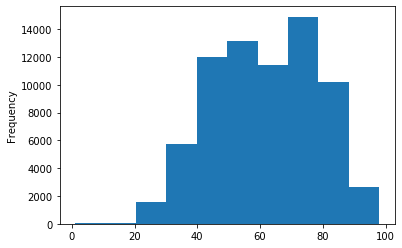

In [3]:
df.AGE.plot.hist()

RL Aspects Modeling

State: Eliminate stuff that is not likely to change over time
Reward: Received Dollar Amount
Episode: Data Promotion Mailed

# Feature Transformations

# Attribute Importance

# Input for Reinforcement Learning 

Episode
State
Action
Reward
Transactions
